# List Down CSV Data

In [14]:
import pandas as pd

student_info = pd.read_csv('studentAssessment.csv')
print(student_info.head())
student_info_df = pd.read_csv('studentInfo.csv')
print(student_info_df.head())
student_assessment_df = pd.read_csv('studentAssessment.csv')
print(student_assessment_df.head())
assessments_df = pd.read_csv('assessments.csv')
print(assessments_df.head())



   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20

# Merge CSV together 
## Merging Tables: 
The OULAD dataset is composed of several interrelated tables connected by unique identifiers. We merged key tables (such as studentInfo.csv, studentVle.csv, assessments.csv, and studentAssessment.csv) using the common identifiers id_student, code_module, and code_presentation. This allowed us to create a single, comprehensive dataset that captures all relevant features for predicting student performance.
Here's a Python code snippet using pandas to merge the key tables from the Open University Learning Analytics Dataset (OULAD) into a single, comprehensive dataset. This code assumes that you have the necessary CSV files (studentInfo.csv, courses.csv and assessments.csv) downloaded and available.

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the datasets
student_info_df = pd.read_csv('studentInfo.csv')
student_assessment_df = pd.read_csv('studentAssessment.csv')
assessments_df = pd.read_csv('assessments.csv')


# Step 1: Merge the studentAssessment with assessments on 'id_assessment'
merged_assessments_df = pd.merge(student_assessment_df, assessments_df, on='id_assessment')

# Step 2: Merge the resulting DataFrame with studentInfo on 'id_student', 'code_module', and 'code_presentation'
final_merged_df = pd.merge(merged_assessments_df, student_info_df, on=['id_student', 'code_module', 'code_presentation'])



# Display the first few rows of the final merged dataset
print(final_merged_df.head())

# Optional: Save the final merged dataset to a CSV file
final_merged_df.to_csv('final_merged_oulad_data.csv', index=False)

# Check the shape of the final merged dataset
print(f"Merged dataset has {final_merged_df.shape[0]} rows and {final_merged_df.shape[1]} columns.")


# Check Missing Values 

In [15]:
import pandas as pd

# Assuming the dataset is loaded into a DataFrame, for example:
# df = pd.read_csv('your_dataset.csv')

# Find total missing values for each column
missing_values = final_merged_df.isnull().sum()

# Display the columns with their corresponding number of missing values
print(missing_values)

# You can also filter columns that have missing values by adding this:
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
id_assessment              0
id_student                 0
date_submitted             0
is_banked                  0
score                    173
code_module                0
code_presentation          0
assessment_type            0
date                    2865
weight                     0
gender                     0
region                     0
highest_education          0
imd_band                7697
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64
Columns with missing values:
score        173
date        2865
imd_band    7697
dtype: int64


# Remove Missing Values 

In [4]:
import pandas as pd

# Assuming df is your loaded DataFrame (e.g., df = pd.read_csv('your_dataset.csv'))

# Remove rows with any missing values
df_cleaned = final_merged_df.dropna()

# Display the first few rows of the cleaned dataset
print(df_cleaned.head())

# Optional: You can also check the shape of the cleaned dataset to see how many rows/columns remain
print(f"Cleaned dataset has {df_cleaned.shape[0]} rows and {df_cleaned.shape[1]} columns.")
missing_values = df_cleaned.isnull().sum()

# Display the columns with their corresponding number of missing values
print(missing_values)

# You can also filter columns that have missing values by adding this:
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)



   id_assessment  id_student  date_submitted  is_banked  score code_module  \
0           1752       11391              18          0   78.0         AAA   
1           1752       28400              22          0   70.0         AAA   
2           1752       31604              17          0   72.0         AAA   
3           1752       32885              26          0   69.0         AAA   
4           1752       38053              19          0   79.0         AAA   

  code_presentation assessment_type  date  weight gender  \
0             2013J             TMA  19.0    10.0      M   
1             2013J             TMA  19.0    10.0      F   
2             2013J             TMA  19.0    10.0      F   
3             2013J             TMA  19.0    10.0      F   
4             2013J             TMA  19.0    10.0      M   

                 region      highest_education imd_band age_band  \
0   East Anglian Region       HE Qualification  90-100%     55<=   
1              Scotland       HE Q

In [28]:
# Convert date_submitted and date columns to datetime format (assuming 'date' is a time-related column)
df_cleaned['date_submitted'] = pd.to_datetime(df_cleaned['date_submitted'], errors='coerce')
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')

# Check the data types to ensure proper conversion
df_cleaned.dtypes

date_submitted          datetime64[ns]
score                          float64
code_module                     object
code_presentation               object
assessment_type                 object
date                    datetime64[ns]
weight                         float64
gender                          object
region                          object
highest_education               object
imd_band                        object
age_band                        object
num_of_prev_attempts             int64
studied_credits                  int64
disability                      object
final_result                    object
final_result_encoded             int64
dtype: object

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'data' is your final dataset
# Drop irrelevant columns and the target column 'score'
features = data.drop(columns=['code_module', 'code_presentation', 'final_result_encoded', 'score', 'imd_band'])

# One-hot encoding for categorical variables
features_encoded = pd.get_dummies(features, drop_first=True)

# Use 'score' as the target variable
target = data['score']

# Ensure that features is a DataFrame and target is a Series
assert isinstance(features_encoded, pd.DataFrame), "Features should be a DataFrame"
assert isinstance(target, pd.Series), "Target should be a Series"

# Train a RandomForestRegressor to assess feature importance for predicting 'score'
model = RandomForestRegressor(random_state=42)
model.fit(features_encoded, target)

# Get feature importances
importances = model.feature_importances_

# Create a bar plot of feature importances
feature_names = features_encoded.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.title('Feature Importance for Predicting Score')
plt.xlabel('Relative Importance')
plt.show()


In [5]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for ordinal categorical variables
label_encoder = LabelEncoder()
df_cleaned['final_result_encoded'] = label_encoder.fit_transform(df_cleaned['final_result'])

# Check encoding result
print(df_cleaned[['final_result', 'final_result_encoded']].head())


  final_result  final_result_encoded
0         Pass                     2
1         Pass                     2
2         Pass                     2
3         Pass                     2
4         Pass                     2


/tmp/ipykernel_117968/311559114.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['final_result_encoded'] = label_encoder.fit_transform(df_cleaned['final_result'])


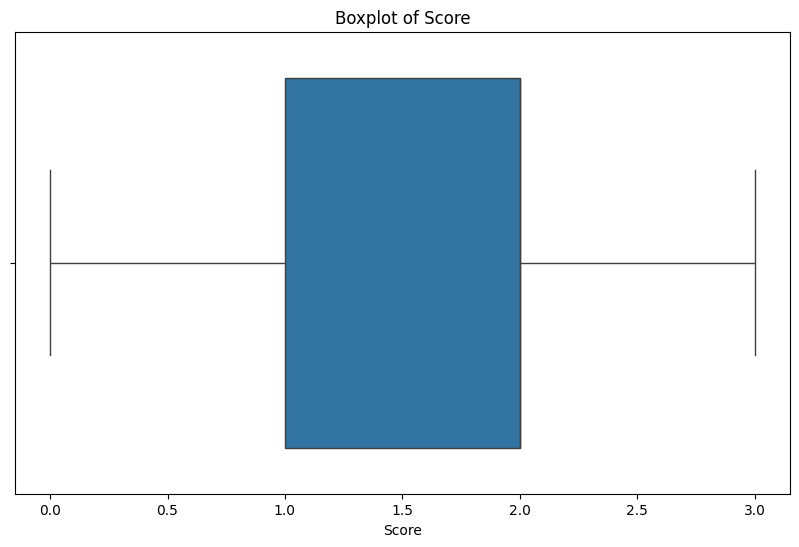

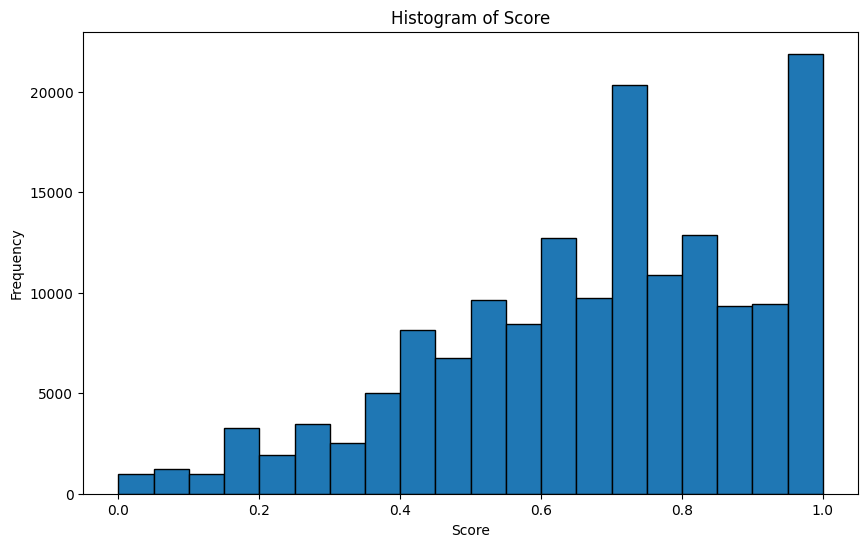

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for 'score' column to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=final_encoded_df['final_result_encoded'])
plt.title('Boxplot of Score')
plt.xlabel('Score')
plt.show()

# Histogram for 'score' column to visualize distribution
plt.figure(figsize=(10, 6))
plt.hist(final_encoded_df['score'], bins=20, edgecolor='black')
plt.title('Histogram of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [6]:
df_cleaned.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_result_encoded
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,2
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,2
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,2
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,2


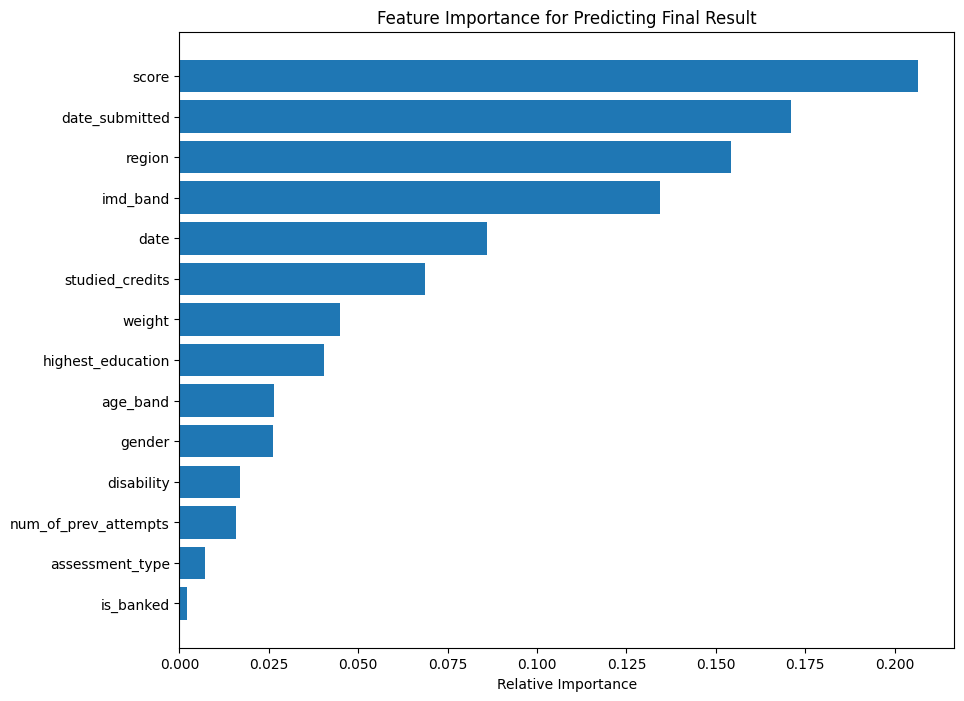

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
data=final_merged_df
# Prepare the data for modeling
# Drop irrelevant columns for predicting 'final_result'
features = data.drop(columns=['final_result', 'id_student', 'id_assessment', 'code_module', 'code_presentation'])

# Convert categorical features to numeric using LabelEncoder
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

# Encode target variable 'final_result'
target = LabelEncoder().fit_transform(data['final_result'])

# Train a RandomForestClassifier to assess feature importance
model = RandomForestClassifier(random_state=42)
model.fit(features, target)

# Get feature importances
importances = model.feature_importances_

# Create a bar plot of feature importances
feature_names = features.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.title('Feature Importance for Predicting Final Result')
plt.xlabel('Relative Importance')
plt.show()



In [8]:
# Get the total number of records (rows) in the cleaned dataset
total_records = df_cleaned.shape[0]
total_records


163394

In [9]:
# Drop unnecessary columns from the dataset
columns_to_drop = ['id_assessment', 'id_student','is_banked']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned dataset without the unnecessary columns
df_cleaned.head()


,date_submitted,score,code_module,code_presentation,assessment_type,date,weight,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_result_encoded
0,18,78.0,AAA,2013J,TMA,19.0,10.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,2
1,22,70.0,AAA,2013J,TMA,19.0,10.0,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,2
2,17,72.0,AAA,2013J,TMA,19.0,10.0,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2
3,26,69.0,AAA,2013J,TMA,19.0,10.0,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,2
4,19,79.0,AAA,2013J,TMA,19.0,10.0,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,2


In [10]:
import pandas as pd

# One-hot encoding for categorical variables
final_encoded_df = pd.get_dummies(df_cleaned, columns=['final_result'], drop_first=True)

# Display the first few rows after encoding
final_encoded_df.head()


,date_submitted,score,code_module,code_presentation,assessment_type,date,weight,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result_encoded,final_result_Fail,final_result_Pass,final_result_Withdrawn
0,18,78.0,AAA,2013J,TMA,19.0,10.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,2,False,True,False
1,22,70.0,AAA,2013J,TMA,19.0,10.0,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,2,False,True,False
2,17,72.0,AAA,2013J,TMA,19.0,10.0,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,2,False,True,False
3,26,69.0,AAA,2013J,TMA,19.0,10.0,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,2,False,True,False
4,19,79.0,AAA,2013J,TMA,19.0,10.0,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,2,False,True,False


In [11]:
# Since we've removed id_student, let's group by code_module and presentation to calculate the average assessment score per student/module
final_encoded_df['avg_assessment_score'] = final_encoded_df.groupby(['code_module', 'code_presentation'])['score'].transform('mean')

# Display the updated DataFrame with the new feature
final_encoded_df.head()


,date_submitted,score,code_module,code_presentation,assessment_type,date,weight,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result_encoded,final_result_Fail,final_result_Pass,final_result_Withdrawn,avg_assessment_score
0,18,78.0,AAA,2013J,TMA,19.0,10.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,2,False,True,False,69.287918
1,22,70.0,AAA,2013J,TMA,19.0,10.0,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,2,False,True,False,69.287918
2,17,72.0,AAA,2013J,TMA,19.0,10.0,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,2,False,True,False,69.287918
3,26,69.0,AAA,2013J,TMA,19.0,10.0,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,2,False,True,False,69.287918
4,19,79.0,AAA,2013J,TMA,19.0,10.0,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,2,False,True,False,69.287918


In [22]:
# Convert date_submitted and date columns to datetime format (assuming 'date' is a time-related column)
final_encoded_df['date_submitted'] = pd.to_datetime(final_encoded_df['date_submitted'], errors='coerce')
final_encoded_df['date'] = pd.to_datetime(final_encoded_df['date'], errors='coerce')

# Check the data types to ensure proper conversion
final_encoded_df.dtypes


date_submitted            datetime64[ns]
score                            float64
code_module                       object
code_presentation                 object
assessment_type                   object
date                      datetime64[ns]
weight                           float64
gender                            object
region                            object
highest_education                 object
imd_band                          object
age_band                          object
num_of_prev_attempts               int64
studied_credits                    int64
disability                        object
final_result_encoded               int64
final_result_Fail                   bool
final_result_Pass                   bool
final_result_Withdrawn              bool
avg_assessment_score             float64
dtype: object

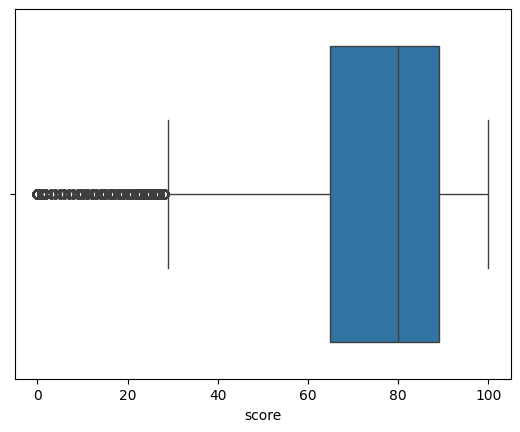

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a boxplot to detect outliers in 'score'
sns.boxplot(x=final_encoded_df['score'])
plt.show()

# Optionally, you can remove or cap outliers at specific thresholds (e.g., within 1.5 times the IQR)
Q1 = final_encoded_df['score'].quantile(0.25)
Q3 = final_encoded_df['score'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
final_encoded_df = final_encoded_df[(final_encoded_df['score'] >= lower_bound) & (final_encoded_df['score'] <= upper_bound)]


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling to continuous features
final_encoded_df[['studied_credits', 'score', 'avg_assessment_score']] = scaler.fit_transform(final_encoded_df[['studied_credits', 'score', 'avg_assessment_score']])

# Display the scaled values
final_encoded_df.head()


,date_submitted,score,code_module,code_presentation,assessment_type,date,weight,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result_encoded,final_result_Fail,final_result_Pass,final_result_Withdrawn,avg_assessment_score
0,1970-01-01 00:00:00.000000018,0.690141,AAA,2013J,TMA,1970-01-01 00:00:00.000000019,10.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,0.35,N,2,False,True,False,0.212191
1,1970-01-01 00:00:00.000000022,0.577465,AAA,2013J,TMA,1970-01-01 00:00:00.000000019,10.0,F,Scotland,HE Qualification,20-30%,35-55,0,0.05,N,2,False,True,False,0.212191
2,1970-01-01 00:00:00.000000017,0.605634,AAA,2013J,TMA,1970-01-01 00:00:00.000000019,10.0,F,South East Region,A Level or Equivalent,50-60%,35-55,0,0.05,N,2,False,True,False,0.212191
3,1970-01-01 00:00:00.000000026,0.563380,AAA,2013J,TMA,1970-01-01 00:00:00.000000019,10.0,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,0.05,N,2,False,True,False,0.212191
4,1970-01-01 00:00:00.000000019,0.704225,AAA,2013J,TMA,1970-01-01 00:00:00.000000019,10.0,M,Wales,A Level or Equivalent,80-90%,35-55,0,0.05,N,2,False,True,False,0.212191


In [25]:
# Let's drop the additional columns that are no longer needed
columns_to_drop = ['date', 'date_submitted','region','code_module','code_presentation','assessment_type']

# Drop the specified columns
final_encoded_df = final_encoded_df.drop(columns=columns_to_drop)

# Display the first few rows of the final DataFrame after dropping columns
final_encoded_df.head()


,score,weight,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result_encoded,final_result_Fail,final_result_Pass,final_result_Withdrawn,avg_assessment_score
0,0.690141,10.0,M,HE Qualification,90-100%,55<=,0,0.35,N,2,False,True,False,0.212191
1,0.577465,10.0,F,HE Qualification,20-30%,35-55,0,0.05,N,2,False,True,False,0.212191
2,0.605634,10.0,F,A Level or Equivalent,50-60%,35-55,0,0.05,N,2,False,True,False,0.212191
3,0.563380,10.0,F,Lower Than A Level,50-60%,0-35,0,0.05,N,2,False,True,False,0.212191
4,0.704225,10.0,M,A Level or Equivalent,80-90%,35-55,0,0.05,N,2,False,True,False,0.212191
